# Bank marketing data analysis

Here is my first project and the first iteration I did to predict if a client would subscribe to a term deposit from his/her information and figure out how that would come. I got this data set from UCI Machine Learning Repository, and this data set was available from this article Moro et al., 2014, which used other kinds of tools to predict the subscription.

# Set up data

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

In [182]:
PATH = '~/Documentos/projetos_ds/telemarketing_bank/bank-full-dates.csv'
bank_data = pd.read_csv(PATH)
print(bank_data)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  year  duration  campai

# Some summarized calculations

In [183]:
bank_data.describe()

age        balance           day          year      duration  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419   2008.444626    258.163080   
std       10.618762    3044.765829      8.322476      0.602364    257.527812   
min       18.000000   -8019.000000      1.000000   2008.000000      0.000000   
25%       33.000000      72.000000      8.000000   2008.000000    103.000000   
50%       39.000000     448.000000     16.000000   2008.000000    180.000000   
75%       48.000000    1428.000000     21.000000   2009.000000    319.000000   
max       95.000000  102127.000000     31.000000   2010.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [184]:
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  year  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may  2008       261         1     -1         0  unknown   
1  unknown    5   may  2008       151         1     -1         0  unknown   
2  unknown    5   may  2008        76         1     -1         0  unknown   
3  unknown    5   may  2008        92         1     -1         0  unknown   
4  unknown    5   may  2008       198         1     -1         0  unknown   

    lc_date   y  
0  5may2008  no  
1  5may2008  no  
2  5may2008  no  
3  5may2008  no  
4  5may2008  no

In [185]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'year', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'lc_date', 'y'],
      dtype='object')

In [186]:
bank_data['lc_date'] = pd.to_datetime(bank_data['lc_date'], format='%d%b%Y')


In [187]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
year         0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
lc_date      0
y            0
dtype: int64

In [188]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
year            3
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
lc_date       561
y               2
dtype: int64

In [189]:
bank_data.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
year                  int64
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
lc_date      datetime64[ns]
y                    object
dtype: object

In [190]:
bank_data.loc[(bank_data['pdays'] == -1), 'pdays'] = 0

In [191]:
bank_data.describe()

age        balance           day          year      duration  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419   2008.444626    258.163080   
std       10.618762    3044.765829      8.322476      0.602364    257.527812   
min       18.000000   -8019.000000      1.000000   2008.000000      0.000000   
25%       33.000000      72.000000      8.000000   2008.000000    103.000000   
50%       39.000000     448.000000     16.000000   2008.000000    180.000000   
75%       48.000000    1428.000000     21.000000   2009.000000    319.000000   
max       95.000000  102127.000000     31.000000   2010.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     41.015195      0.580323  
std        3.098021     99.792615      2.303441  
min        1.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000  
75%        3.000000      0.000000      0.000000  
max       63.000000    871.000000    275.000000

In [192]:
yes_df = bank_data.loc[(bank_data['y'] == 'yes'), :]
yes_df.describe()

age       balance          day         year     duration  \
count  5289.000000   5289.000000  5289.000000  5289.000000  5289.000000   
mean     41.670070   1804.267915    15.158253  2008.990735   537.294574   
std      13.497781   3501.104777     8.501875     0.721475   392.525262   
min      18.000000  -3058.000000     1.000000  2008.000000     8.000000   
25%      31.000000    210.000000     8.000000  2008.000000   244.000000   
50%      38.000000    733.000000    15.000000  2009.000000   426.000000   
75%      50.000000   2159.000000    22.000000  2010.000000   725.000000   
max      95.000000  81204.000000    31.000000  2010.000000  3881.000000   

          campaign        pdays     previous  
count  5289.000000  5289.000000  5289.000000  
mean      2.141047    69.342787     1.170354  
std       1.921826   118.447245     2.553272  
min       1.000000     0.000000     0.000000  
25%       1.000000     0.000000     0.000000  
50%       2.000000     0.000000     0.000000  
75%       3.000000    98.000000     1.000000  
max      32.000000   854.000000    58.000000

In [193]:
no_df = bank_data.loc[(bank_data['y'] == 'no'), :]
no_df.describe()

age        balance           day          year      duration  \
count  39922.000000   39922.000000  39922.000000  39922.000000  39922.000000   
mean      40.838986    1303.714969     15.892290   2008.372276    221.182806   
std       10.172662    2974.195473      8.294728      0.545177    207.383237   
min       18.000000   -8019.000000      1.000000   2008.000000      0.000000   
25%       33.000000      58.000000      8.000000   2008.000000     95.000000   
50%       39.000000     417.000000     16.000000   2008.000000    164.000000   
75%       48.000000    1345.000000     21.000000   2009.000000    279.000000   
max       95.000000  102127.000000     31.000000   2010.000000   4918.000000   

           campaign         pdays      previous  
count  39922.000000  39922.000000  39922.000000  
mean       2.846350     37.262261      0.502154  
std        3.212767     96.432053      2.256771  
min        1.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000  
75%        3.000000      0.000000      0.000000  
max       63.000000    871.000000    275.000000

# Job frequencies

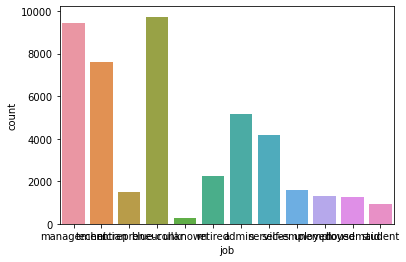

In [251]:
job_freq = sns.countplot(x = bank_data['job']);

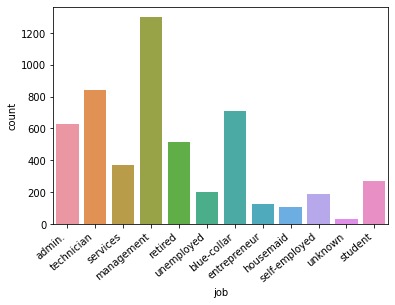

In [195]:
yes_job_freq = sns.countplot(x = yes_df['job']);
yes_job_freq.set_xticklabels(yes_job_freq.get_xticklabels(), rotation=40, ha="right");

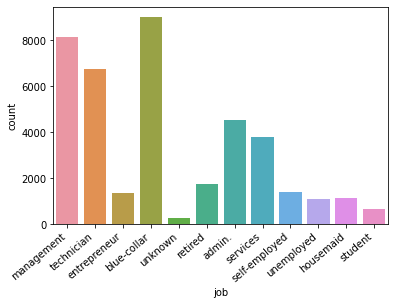

In [196]:
no_job_freq = sns.countplot(x = no_df['job']);
no_job_freq.set_xticklabels(no_job_freq.get_xticklabels(), rotation=40, ha="right");

# Age frequencies

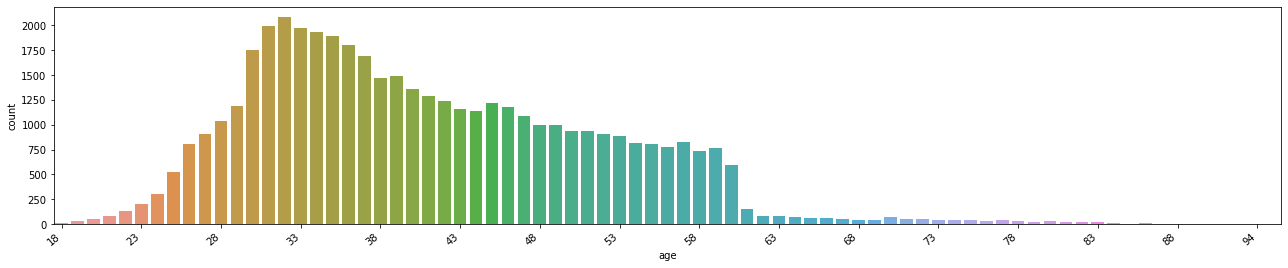

In [197]:
plt.figure(figsize=(22,4))
age_freq = sns.countplot(x = bank_data['age']);
age_freq.set_xticklabels(age_freq.get_xticklabels(), rotation=40, ha="right");
age_freq.xaxis.set_major_locator(ticker.MultipleLocator(5))

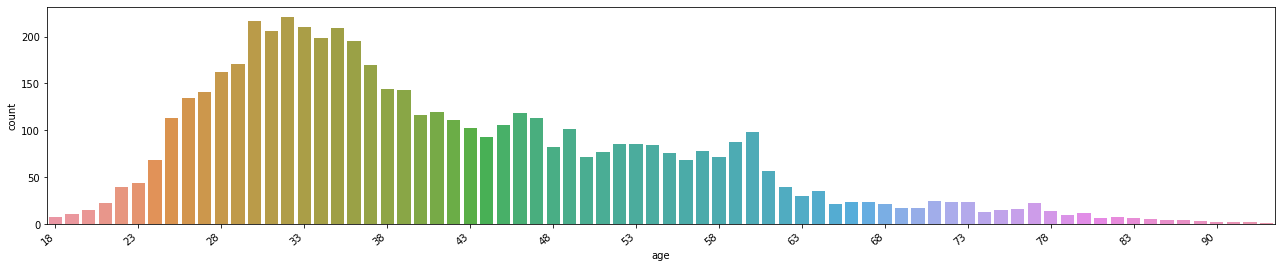

In [198]:
plt.figure(figsize=(22,4))
yes_age_freq = sns.countplot(x = yes_df['age']);
yes_age_freq.set_xticklabels(yes_age_freq.get_xticklabels(), rotation=40, ha="right");
yes_age_freq.xaxis.set_major_locator(ticker.MultipleLocator(5))

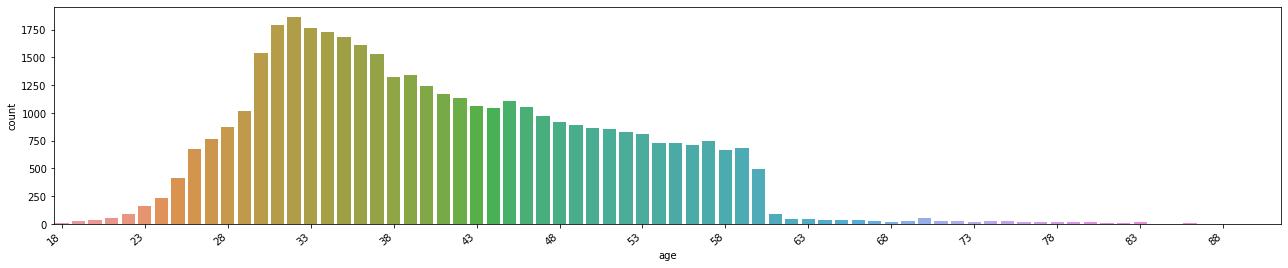

In [199]:
plt.figure(figsize=(22,4))
no_age_freq = sns.countplot(x = no_df['age']);
no_age_freq.set_xticklabels(no_age_freq.get_xticklabels(), rotation=40, ha="right");
no_age_freq.xaxis.set_major_locator(ticker.MultipleLocator(5))

# Marital frequencies

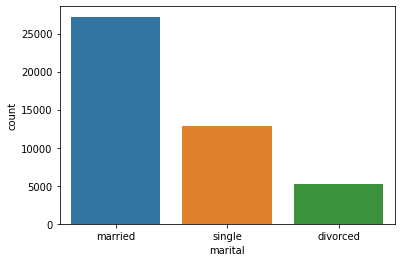

In [200]:
marital_freq = sns.countplot(x = bank_data['marital']);

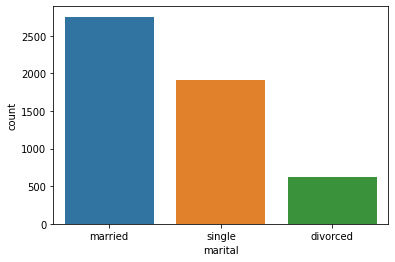

In [201]:
yes_marital_freq = sns.countplot(x = yes_df['marital']);

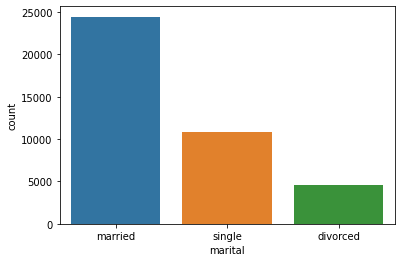

In [202]:
no_marital_freq = sns.countplot(x = no_df['marital']);

# Education frequencies

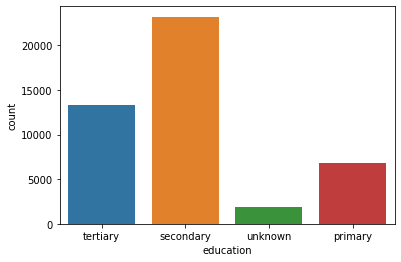

In [203]:
education_freq = sns.countplot(x = bank_data['education']);

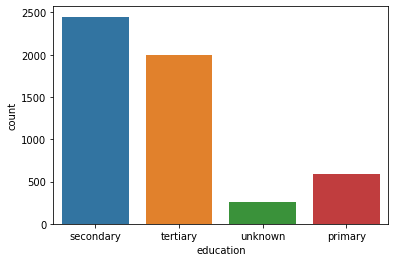

In [204]:
yes_education_freq = sns.countplot(x = yes_df['education']);

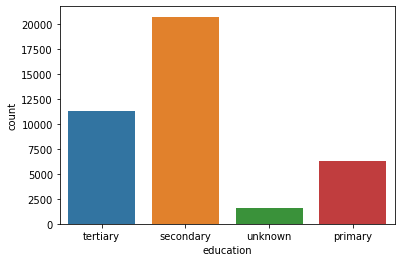

In [205]:
no_education_freq = sns.countplot(x = no_df['education']);

# Default frequencies

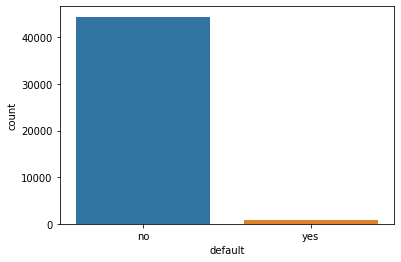

In [206]:
default_freq = sns.countplot(x = bank_data['default']);

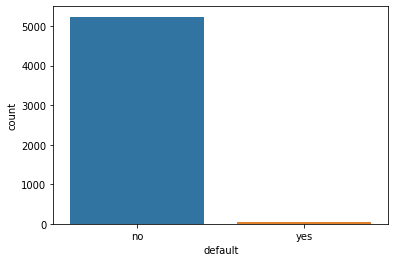

In [207]:
yes_default_freq = sns.countplot(x = yes_df['default']);

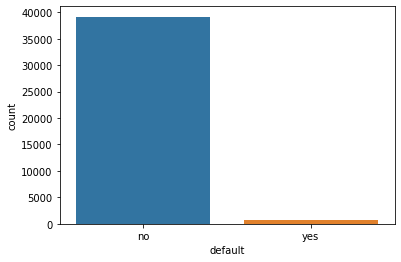

In [208]:
no_default_freq = sns.countplot(x = no_df['default']);

# Housing frequencies

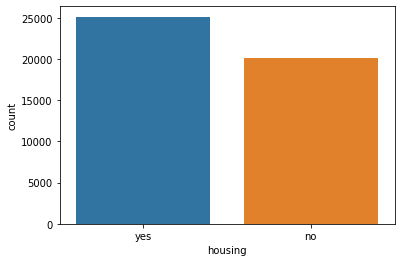

In [209]:
housing_freq = sns.countplot(x = bank_data['housing']);

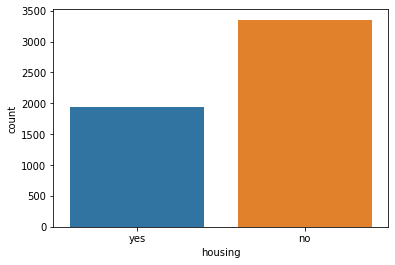

In [210]:
yes_housing_freq = sns.countplot(x = yes_df['housing']);

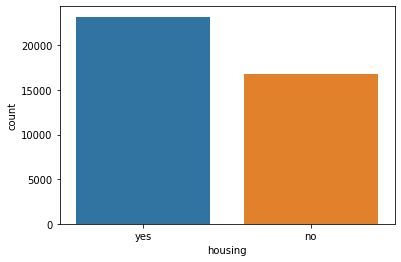

In [211]:
no_housing_freq = sns.countplot(x = no_df['housing']);

# Loan frequencies

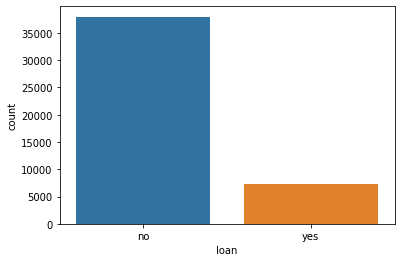

In [212]:
loan_freq = sns.countplot(x = bank_data['loan']);

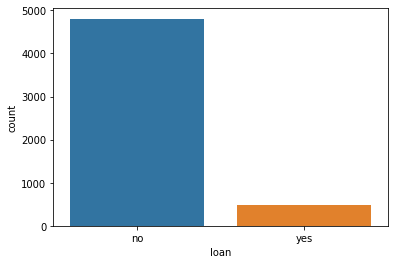

In [213]:
yes_loan_freq = sns.countplot(x = yes_df['loan']);

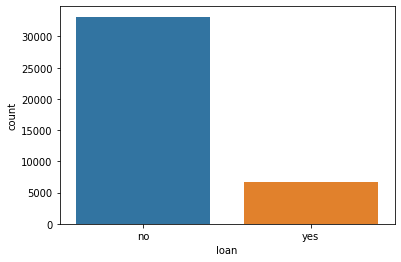

In [214]:
no_loan_freq = sns.countplot(x = no_df['loan']);

# Contact frequencies

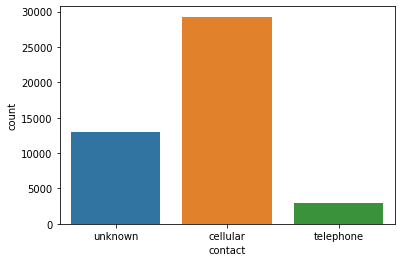

In [215]:
contact_freq = sns.countplot(x = bank_data['contact']);

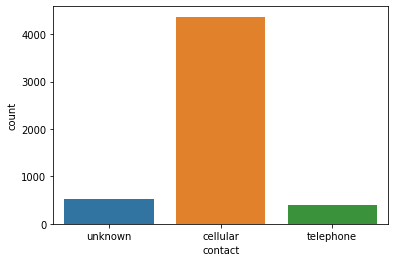

In [216]:
yes_contact_freq = sns.countplot(x = yes_df['contact']);

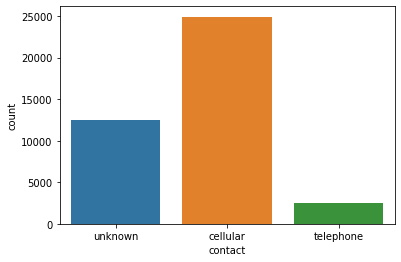

In [217]:
no_contact_freq = sns.countplot(x = no_df['contact']);

# Poutcome frequencies

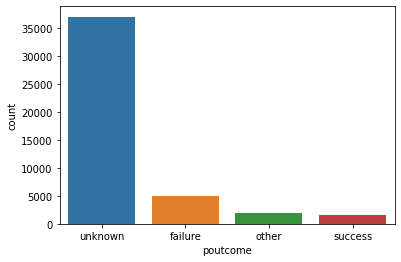

In [218]:
poutcome_freq = sns.countplot(x = bank_data['poutcome']);

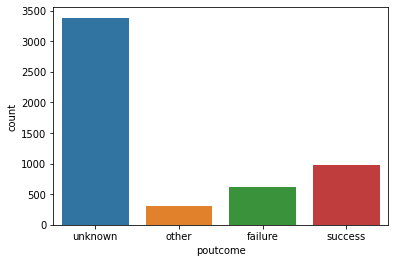

In [219]:
yes_poutcome_freq = sns.countplot(x = yes_df['poutcome']);

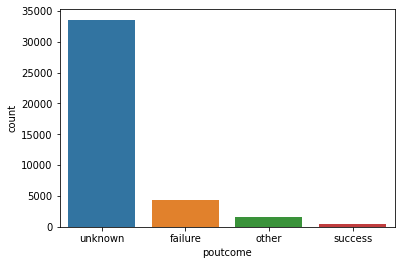

In [220]:
no_poutcome_freq = sns.countplot(x = no_df['poutcome']);

# Previous frequencies

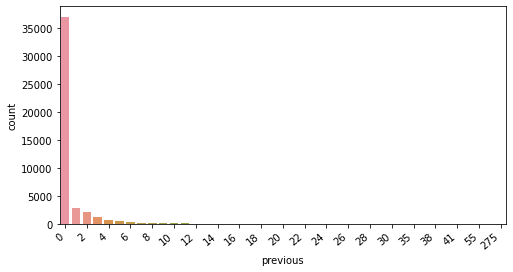

In [221]:
plt.figure(figsize=(8,4))
previous_freq = sns.countplot(x = bank_data['previous']);
previous_freq.set_xticklabels(previous_freq.get_xticklabels(), rotation=40, ha="right");
previous_freq.xaxis.set_major_locator(ticker.MultipleLocator(2))

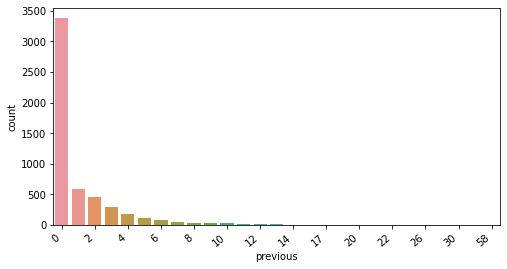

In [222]:
plt.figure(figsize=(8,4))
yes_previous_freq = sns.countplot(x = yes_df['previous']);
yes_previous_freq.set_xticklabels(yes_previous_freq.get_xticklabels(), rotation=40, ha="right");
yes_previous_freq.xaxis.set_major_locator(ticker.MultipleLocator(2))

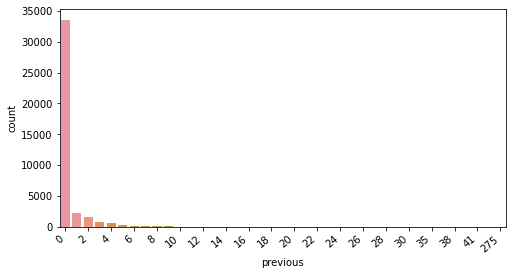

In [223]:
plt.figure(figsize=(8,4))
no_previous_freq = sns.countplot(x = no_df['previous']);
no_previous_freq.set_xticklabels(no_previous_freq.get_xticklabels(), rotation=40, ha="right");
no_previous_freq.xaxis.set_major_locator(ticker.MultipleLocator(2))

# Duration frequencies

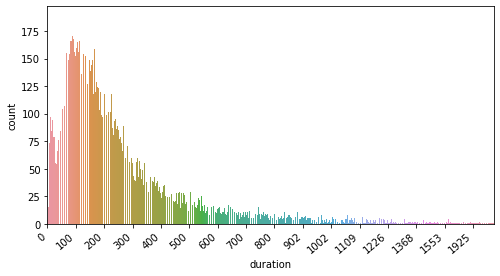

In [224]:
plt.figure(figsize=(8,4))
duration_freq = sns.countplot(x = bank_data['duration']);
duration_freq.set_xticklabels(duration_freq.get_xticklabels(), rotation=40, ha="right");
duration_freq.xaxis.set_major_locator(ticker.MultipleLocator(100))

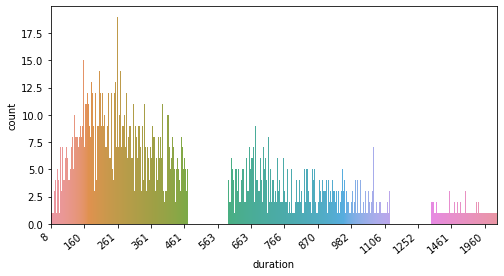

In [225]:
plt.figure(figsize=(8,4))
yes_duration_freq = sns.countplot(x = yes_df['duration']);
yes_duration_freq.set_xticklabels(yes_duration_freq.get_xticklabels(), rotation=40, ha="right");
yes_duration_freq.xaxis.set_major_locator(ticker.MultipleLocator(100))

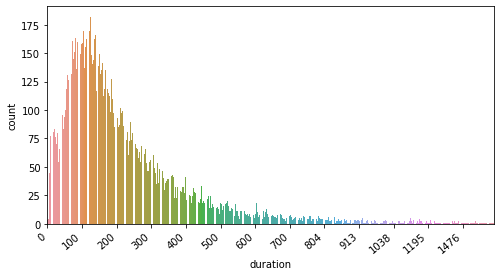

In [226]:
plt.figure(figsize=(8,4))
no_duration_freq = sns.countplot(x = no_df['duration']);
no_duration_freq.set_xticklabels(no_duration_freq.get_xticklabels(), rotation=40, ha="right");
no_duration_freq.xaxis.set_major_locator(ticker.MultipleLocator(100))

# Campaign frequencies

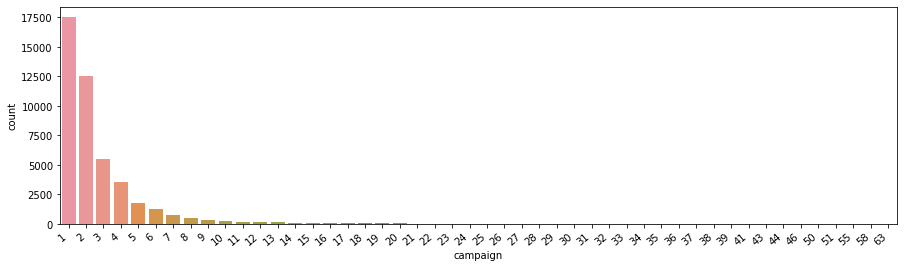

In [227]:
plt.figure(figsize=(15,4))
campaign_freq = sns.countplot(x = bank_data['campaign']);
campaign_freq.set_xticklabels(campaign_freq.get_xticklabels(), rotation=40, ha="right");

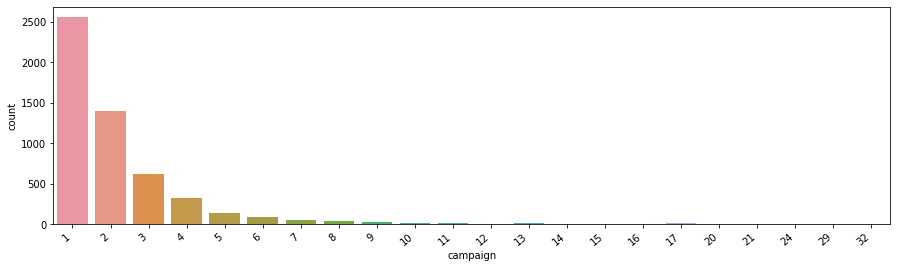

In [228]:
plt.figure(figsize=(15,4))
yes_campaign_freq = sns.countplot(x = yes_df['campaign']);
yes_campaign_freq.set_xticklabels(yes_campaign_freq.get_xticklabels(), rotation=40, ha="right");

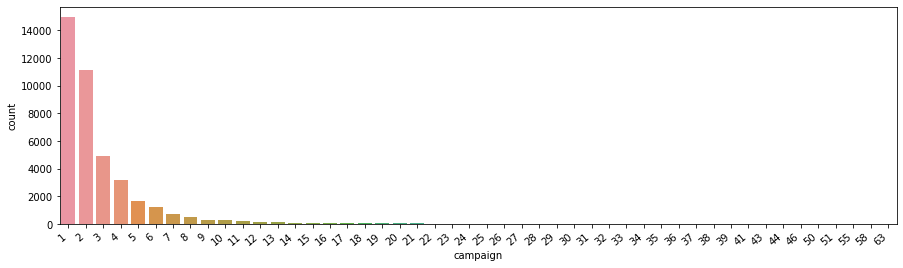

In [229]:
plt.figure(figsize=(15,4))
no_campaign_freq = sns.countplot(x = no_df['campaign']);
no_campaign_freq.set_xticklabels(no_campaign_freq.get_xticklabels(), rotation=40, ha="right");

# Date frequencies

In [240]:
df_count = bank_data[['lc_date', 'y']].groupby(['lc_date']).count().reset_index()
df_count_date = px.histogram(x = df_count['lc_date'], y = df_count['y'])
df_count_date.show()
df_count

lc_date    y
0   2008-05-05  361
1   2008-05-06  405
2   2008-05-07  390
3   2008-05-08  453
4   2008-05-09  429
..         ...  ...
556 2010-11-11    4
557 2010-11-12    3
558 2010-11-15    4
559 2010-11-16   17
560 2010-11-17   10

[561 rows x 2 columns]

In [231]:
yes_df_count = yes_df.groupby(by=["lc_date", "y"]).size().reset_index(name="counts")
yes_df_count_date = px.histogram(x = yes_df_count['lc_date'], y = yes_df_count['counts'])
yes_df_count_date.show()

In [232]:
no_df_count = no_df.groupby(by=["lc_date", "y"]).size().reset_index(name="counts")
no_df_count_date = px.histogram(x = no_df_count['lc_date'], y = no_df_count['counts'])
no_df_count_date.show()

# Y frequencies

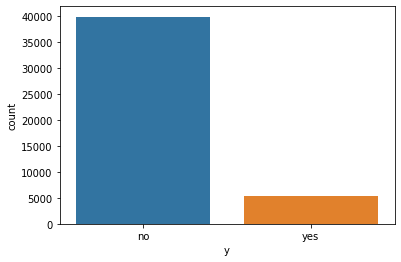

In [233]:
y_freq = sns.countplot(x = bank_data['y']);

# Correlation calculations and graphs

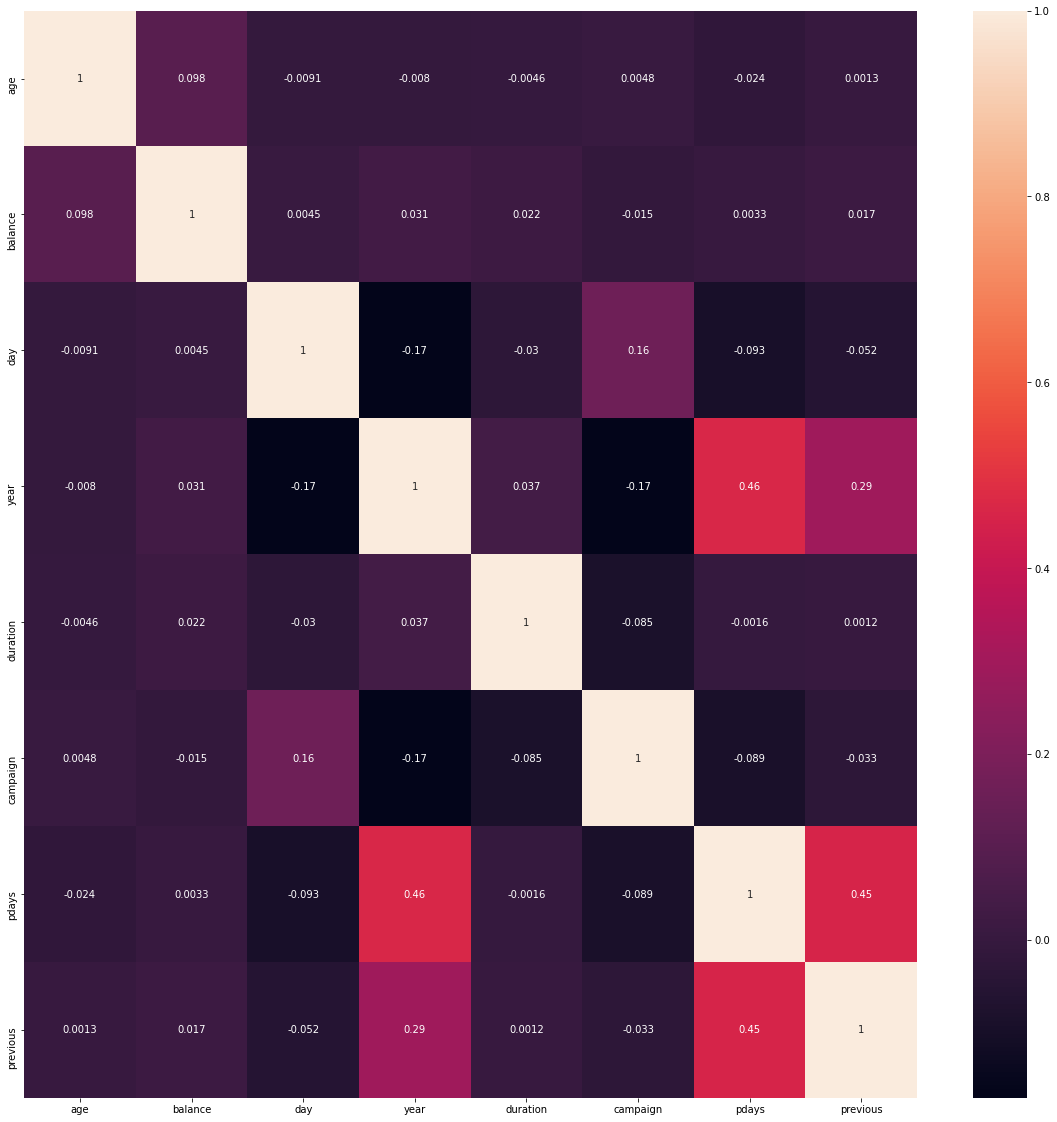

In [234]:
plt.figure(figsize=(20, 20))
corr_map = sns.heatmap(bank_data.corr(), annot=True);

In [235]:
pdays_year_fig = px.scatter(x = bank_data['lc_date'], 
                            y = bank_data ['pdays'], 
                            color = bank_data['y'])
pdays_year_fig.show()

In [236]:
previous_year_fig = px.scatter(x = bank_data['lc_date'], 
                            y = bank_data ['previous'], 
                            color = bank_data['y'])
previous_year_fig.show()